In [1]:
%matplotlib ipympl

import sys
sys.path.append('../')


from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from helper import extract_embeddings

In [2]:
sbert_explained_variance_95 = {
    "alfred": 165,
    "scout": 194,
    "rt1": 27,
    "bridge": 115,
    "tacoplay": 31
}

In [3]:
model_name = "all-mpnet-base-v2" # sbert
dataset_name = "alfred"

results_fp = f"/home/slwanna/neural-feature-extraction/neural_feature_extraction/notebooks/results/01_{model_name}_{dataset_name}"

embeddings = extract_embeddings(f"{results_fp}.csv")

data = np.array(embeddings)

data.shape

(165567, 768)

/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extract

Text(0, 0.5, 'SSE')

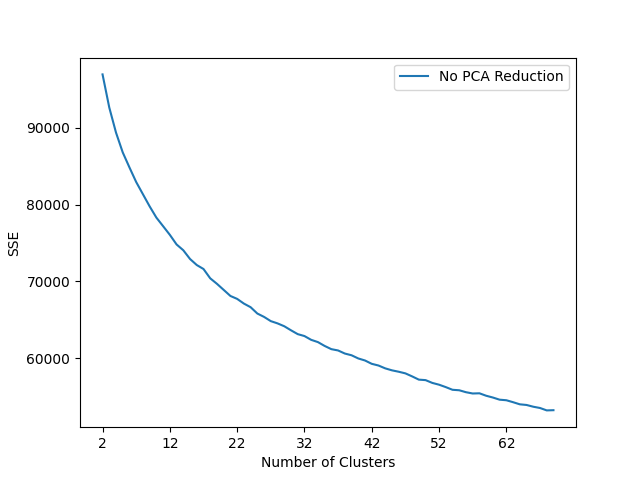

In [4]:
sse = []
k_start = 2
k_end = 70
clusters_range = range(k_start, k_end)

for k in clusters_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# visualize results
plt.plot(clusters_range, sse,  label='No PCA Reduction')
plt.legend()
plt.xticks(np.arange(k_start, k_end, step=10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extract

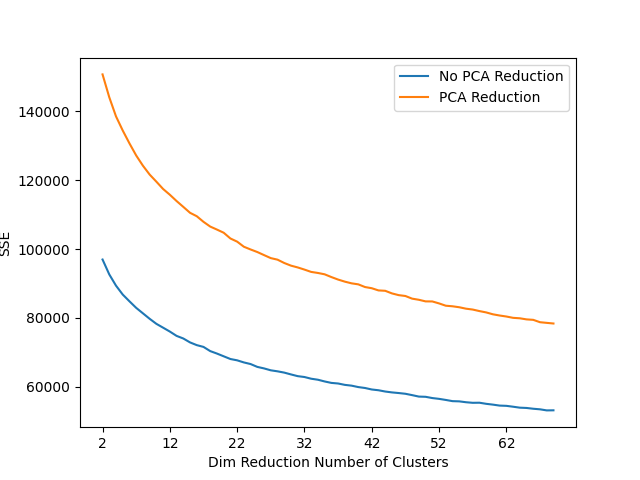

In [5]:
data = np.array(embeddings)
pca=PCA(n_components=sbert_explained_variance_95[dataset_name])
dim_reduced_embeddings = pca.fit_transform(data)

sse = []
X_dim_red = normalize(dim_reduced_embeddings, norm='l2')
k_start = 2
k_end = 70
clusters_range = range(k_start, k_end)

for k in clusters_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_dim_red)
    sse.append(kmeans.inertia_)

# visualize results
plt.plot(clusters_range, sse, label='PCA Reduction')
plt.legend()

plt.xticks(np.arange(k_start, k_end, step=10))
plt.xlabel("Dim Reduction Number of Clusters")
plt.ylabel("SSE")
plt.show()

/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


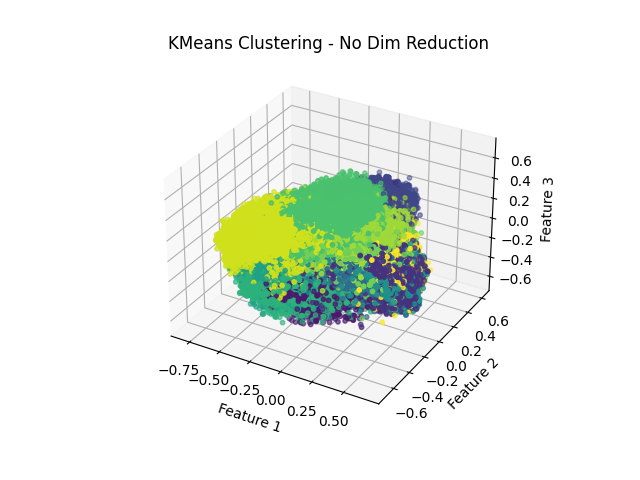

In [6]:
# Fit KMeans with n clusters
N_CLUSTERS = 15

kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(embeddings)

# Get cluster centers and labels for each point
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters
ax.scatter(X_dim_red[:, 0], X_dim_red[:, 1], X_dim_red[:, 2], c=labels, s=10, cmap='viridis')

# Plot the centroids
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=75, alpha=0.75, marker='x')

# Set plot title and labels
ax.set_title('KMeans Clustering - No Dim Reduction')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Show the plot
plt.show()

In [7]:
original_df = pd.read_csv(f"{results_fp}.csv")
original_df["kmeans_labels"] = labels

In [8]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165567 entries, 0 to 165566
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      165567 non-null  int64 
 1   nl_command_exs  165567 non-null  object
 2   embedding       165567 non-null  object
 3   kmeans_labels   165567 non-null  int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 4.4+ MB


In [9]:
original_df.groupby('kmeans_labels')['nl_command_exs'].value_counts(normalize=True).groupby(level=0).head(5)

kmeans_labels  nl_command_exs                  
0              Turn on the lamp                    0.122371
               Turn the lamp on                    0.033778
               Turn on the floor lamp              0.016788
               turn on the lamp                    0.016181
               turn the lamp on                    0.016181
                                                     ...   
14             Heat the apple in the microwave     0.004149
               Put the apple in the microwave      0.003990
               Put the apple in the sink           0.003830
               Pick up the apple on the counter    0.003671
               Pick up a slice of apple            0.003671
Name: proportion, Length: 75, dtype: float64

In [10]:
original_df.groupby('kmeans_labels')['nl_command_exs'].value_counts().groupby(level=0).head(5)

kmeans_labels  nl_command_exs                  
0              Turn on the lamp                    605
               Turn the lamp on                    167
               Turn on the floor lamp               83
               turn on the lamp                     80
               turn the lamp on                     80
                                                  ... 
14             Heat the apple in the microwave      26
               Put the apple in the microwave       25
               Put the apple in the sink            24
               Pick up the apple on the counter     23
               Pick up a slice of apple             23
Name: count, Length: 75, dtype: int64

In [13]:
# Step 1: Store the results in a variable
result = original_df.groupby('kmeans_labels')['nl_command_exs'].value_counts().groupby(level=0).head(15)

# Step 2: Write the result to a .txt file
with open(f"/home/slwanna/neural-feature-extraction/neural_feature_extraction/notebooks/results/{model_name}_{dataset_name}_kmeans_membership_output.txt", "w") as file:
    file.write(result.to_string())